In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
%tensorflow_version 2.x

!pip install tokenizers
!pip install transformers
from transformers import AutoTokenizer, TFAutoModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 3.2MB 11.3MB/s 
     |████████████████████████████████| 1.9MB 10.2MB/s 
     |████████████████████████████████| 890kB 21.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=0b7a97ccfc169770900a69f9538035732a517f0773e519b9342aae844238337a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 133kB 9.9MB/s 
     |████████████████████████████████| 1.2MB 17.6MB/s 
     |████████████████████████████████| 7.3MB 36.3MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
ERROR: botocore 1.20.17 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 w

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/stumbleupon/train.tsv", sep ='\t')
df_test = pd.read_csv("/content/drive/MyDrive/stumbleupon/test.tsv", sep ='\t' )

In [ ]:
df_train

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,http://techcrunch.com/2010/09/08/kno-raises-46...,8958,"{""title"":""Kno Raises 46 Million More To Build ...",computer_internet,0.651067,3.010526,0.474747,0.222222,0.191919,0.191919,0.474273,0.0,0,0.177043,0,0.256669,0.048780,1,1,38,0,2219,99,11,0.040404,0.071429,0
7391,http://www.uncoached.com/category/why-i-miss-c...,8895,"{""title"":""Why I Miss College "",""body"":""Mar 30 ...",culture_politics,0.14192,2.208054,0.483333,0.246667,0.036667,0.026667,0.558184,0.0,0,0.057377,0,0.218014,0.225962,1,1,34,0,5672,300,4,0.020000,0.109453,0
7392,http://eatthis.menshealth.com/slide/sweet-pota...,1191,"{""title"":""Sweet Potatoes Eat This Not That i'...",recreation,0.196273,2.000000,0.315789,0.171053,0.105263,0.052632,0.692529,0.0,0,0.124122,0,0.248388,0.464286,?,1,43,0,848,76,5,0.434211,0.117647,1
7393,http://naturallyella.com/,5612,"{""title"":""Naturally Ella "",""body"":"" "",""url"":""n...",arts_entertainment,0.617876,1.026316,0.210526,0.052632,0.000000,0.000000,21.000000,-1.0,0,0.097778,0,0.256070,-1.000000,1,0,37,1,386,38,0,0.026316,0.333333,1


In [ ]:
df_test

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,http://www.lynnskitchenadventures.com/2009/04/...,5865,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc...",recreation,0.443906,2.558140,0.389706,0.257353,0.044118,0.022059,0.489572,0.0,0,0.067143,0,0.230285,0.199438,1,1,15,0,5643,136,3,0.242647,0.080597
1,http://lolpics.se/18552-stun-grenade-ar,782,"{""title"":""lolpics Stun grenade ar "",""body"":"" f...",culture_politics,0.135844,3.771429,0.461538,0.205128,0.051282,0.000000,0.782051,0.0,0,0.042857,0,0.365962,0.080000,?,1,62,0,382,39,2,0.128205,0.176471
2,http://www.xcelerationfitness.com/treadmills.html,6962,"{""title"":""Treadmills "",""body"":"" treadmills, st...",?,?,2.269565,0.495726,0.384615,0.170940,0.170940,1.250000,0.0,0,0.058824,0,0.161901,10.000000,?,1,42,0,2420,117,1,0.581197,0.125000
3,http://www.bloomberg.com/news/2012-02-06/syria...,7640,"{""title"":""Father s Tactics Used by Assad to Cr...",culture_politics,0.90259,2.523490,0.705502,0.346278,0.122977,0.090615,0.449366,0.0,0,0.058081,0,0.146593,0.005964,1,1,41,0,5559,309,10,0.038835,0.063126
4,http://www.wired.com/gadgetlab/2011/12/stem-tu...,3589,"{""title"":""Stem Turns Lemons and Limes Into Jui...",science_technology,0.486363,1.848000,0.470968,0.161290,0.032258,0.000000,0.453757,0.0,0,0.093023,0,0.244141,0.035714,1,0,34,0,2209,155,10,0.096774,0.065341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,http://busy-mommy.com/2012/02/peep-brownie-smo...,7264,"{""title"":""Peep Brownie S mores Busy Mommy An I...",?,?,1.666667,0.376623,0.129870,0.116883,0.090909,0.451883,0.0,0,0.053763,0,0.227346,0.075630,1,0,16,0,2772,77,3,0.012987,0.063401
3167,http://www.cannabissearch.com/edibles/cheesecake/,9714,"{""url"":""cannabissearch edibles cheesecake"",""ti...",?,?,1.305556,0.654321,0.123457,0.024691,0.000000,0.479177,0.0,0,0.019784,0,0.227176,0.284153,1,0,6,0,6058,81,2,0.333333,0.061995
3168,http://www.tastespotting.com/popular/views/all...,5903,"{""title"":""Most Viewed Submissions All Time mos...",?,?,0.717277,0.291667,0.182292,0.000000,0.000000,0.598441,0.0,0,0.027642,0,0.177000,0.500000,1,0,19,0,2876,192,4,0.177083,0.117647
3169,http://lifehacker.com/5839197/how-to-get-a-ful...,3176,"{""title"":""How to Get a Complete Workout with N...",sports,0.424304,0.940000,0.183333,0.066667,0.016667,0.016667,0.359847,0.0,0,0.071869,0,0.205830,0.014502,1,1,3,0,21029,180,12,0.333333,0.111966


In [ ]:
df_train.isna().sum()

url                               0
urlid                             0
boilerplate                       0
alchemy_category                  0
alchemy_category_score            0
avglinksize                       0
commonlinkratio_1                 0
commonlinkratio_2                 0
commonlinkratio_3                 0
commonlinkratio_4                 0
compression_ratio                 0
embed_ratio                       0
framebased                        0
frameTagRatio                     0
hasDomainLink                     0
html_ratio                        0
image_ratio                       0
is_news                           0
lengthyLinkDomain                 0
linkwordscore                     0
news_front_page                   0
non_markup_alphanum_characters    0
numberOfLinks                     0
numwords_in_url                   0
parametrizedLinkRatio             0
spelling_errors_ratio             0
label                             0
dtype: int64

In [ ]:
df_test.isna().sum()

url                               0
urlid                             0
boilerplate                       0
alchemy_category                  0
alchemy_category_score            0
avglinksize                       0
commonlinkratio_1                 0
commonlinkratio_2                 0
commonlinkratio_3                 0
commonlinkratio_4                 0
compression_ratio                 0
embed_ratio                       0
framebased                        0
frameTagRatio                     0
hasDomainLink                     0
html_ratio                        0
image_ratio                       0
is_news                           0
lengthyLinkDomain                 0
linkwordscore                     0
news_front_page                   0
non_markup_alphanum_characters    0
numberOfLinks                     0
numwords_in_url                   0
parametrizedLinkRatio             0
spelling_errors_ratio             0
dtype: int64

In [ ]:
df_train.describe()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,5305.704665,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,0.056423,0.021231,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221,0.513320
std,3048.384114,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,0.041446,0.144162,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231,0.499856
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2688.500000,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,0.028502,0.000000,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000
50%,5304.000000,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,0.045775,0.000000,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000
75%,7946.500000,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,0.073459,0.000000,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000
max,10566.000000,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,0.444444,1.000000,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,1.000000


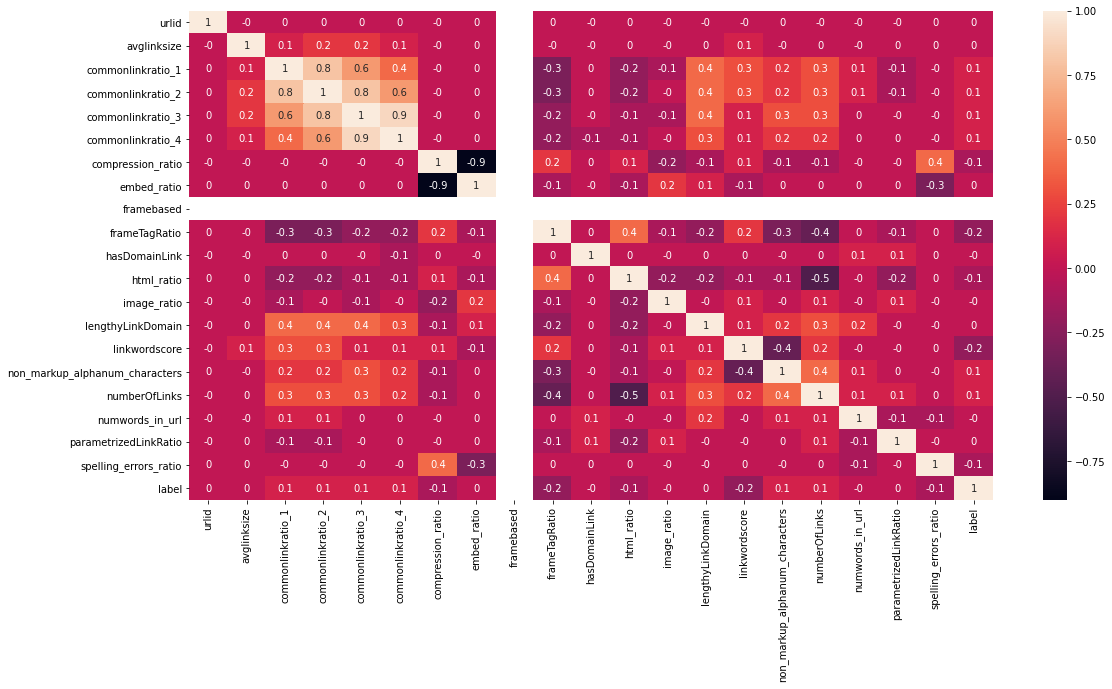

In [ ]:
corr_mat= np.round(df_train.corr(method = 'pearson'),1)
plt.figure(figsize = (18,9))
sns.heatmap(corr_mat, annot = True)
plt.show()


###So this was a very crude feature selection Correlation method and we can see that most of the columns have no or very very less impact on the label (since they are almost zero).
### Now we have url, boilerplate, alchemy_category which may or may not have a serious impact on the labels.

In [ ]:
df_train = df_train.drop(['urlid','alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio'], axis=1)

df_test = df_test.drop(['urlid','alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio'], axis=1)

In [ ]:
df_train

,url,boilerplate,alchemy_category,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0
1,http://www.popsci.com/technology/article/2012-...,"{""title"":""The Fully Electronic Futuristic Star...",recreation,1
2,http://www.menshealth.com/health/flu-fighting-...,"{""title"":""Fruits that Fight the Flu fruits tha...",health,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,1
4,http://bleacherreport.com/articles/1205138-the...,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0
...,...,...,...,...
7390,http://techcrunch.com/2010/09/08/kno-raises-46...,"{""title"":""Kno Raises 46 Million More To Build ...",computer_internet,0
7391,http://www.uncoached.com/category/why-i-miss-c...,"{""title"":""Why I Miss College "",""body"":""Mar 30 ...",culture_politics,0
7392,http://eatthis.menshealth.com/slide/sweet-pota...,"{""title"":""Sweet Potatoes Eat This Not That i'...",recreation,1
7393,http://naturallyella.com/,"{""title"":""Naturally Ella "",""body"":"" "",""url"":""n...",arts_entertainment,1


In [ ]:
df_test

,url,boilerplate,alchemy_category
0,http://www.lynnskitchenadventures.com/2009/04/...,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc...",recreation
1,http://lolpics.se/18552-stun-grenade-ar,"{""title"":""lolpics Stun grenade ar "",""body"":"" f...",culture_politics
2,http://www.xcelerationfitness.com/treadmills.html,"{""title"":""Treadmills "",""body"":"" treadmills, st...",?
3,http://www.bloomberg.com/news/2012-02-06/syria...,"{""title"":""Father s Tactics Used by Assad to Cr...",culture_politics
4,http://www.wired.com/gadgetlab/2011/12/stem-tu...,"{""title"":""Stem Turns Lemons and Limes Into Jui...",science_technology
...,...,...,...
3166,http://busy-mommy.com/2012/02/peep-brownie-smo...,"{""title"":""Peep Brownie S mores Busy Mommy An I...",?
3167,http://www.cannabissearch.com/edibles/cheesecake/,"{""url"":""cannabissearch edibles cheesecake"",""ti...",?
3168,http://www.tastespotting.com/popular/views/all...,"{""title"":""Most Viewed Submissions All Time mos...",?
3169,http://lifehacker.com/5839197/how-to-get-a-ful...,"{""title"":""How to Get a Complete Workout with N...",sports


In [ ]:
missing = df_train['alchemy_category'].value_counts()['?']
print(missing)

2342


In [ ]:
missing = df_test['alchemy_category'].value_counts()['?']
print(missing)

1046


###'alchemy_category' column has around 2000-3000 unnamed data so it has a ambiguity in the data

In [ ]:
df_train.drop('alchemy_category', axis=1)

,url,boilerplate,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,"{""title"":""IBM Sees Holographic Calls Air Breat...",0
1,http://www.popsci.com/technology/article/2012-...,"{""title"":""The Fully Electronic Futuristic Star...",1
2,http://www.menshealth.com/health/flu-fighting-...,"{""title"":""Fruits that Fight the Flu fruits tha...",1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,"{""title"":""10 Foolproof Tips for Better Sleep ""...",1
4,http://bleacherreport.com/articles/1205138-the...,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",0
...,...,...,...
7390,http://techcrunch.com/2010/09/08/kno-raises-46...,"{""title"":""Kno Raises 46 Million More To Build ...",0
7391,http://www.uncoached.com/category/why-i-miss-c...,"{""title"":""Why I Miss College "",""body"":""Mar 30 ...",0
7392,http://eatthis.menshealth.com/slide/sweet-pota...,"{""title"":""Sweet Potatoes Eat This Not That i'...",1
7393,http://naturallyella.com/,"{""title"":""Naturally Ella "",""body"":"" "",""url"":""n...",1


In [ ]:
df_test.drop('alchemy_category', axis=1)

,url,boilerplate
0,http://www.lynnskitchenadventures.com/2009/04/...,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc..."
1,http://lolpics.se/18552-stun-grenade-ar,"{""title"":""lolpics Stun grenade ar "",""body"":"" f..."
2,http://www.xcelerationfitness.com/treadmills.html,"{""title"":""Treadmills "",""body"":"" treadmills, st..."
3,http://www.bloomberg.com/news/2012-02-06/syria...,"{""title"":""Father s Tactics Used by Assad to Cr..."
4,http://www.wired.com/gadgetlab/2011/12/stem-tu...,"{""title"":""Stem Turns Lemons and Limes Into Jui..."
...,...,...
3166,http://busy-mommy.com/2012/02/peep-brownie-smo...,"{""title"":""Peep Brownie S mores Busy Mommy An I..."
3167,http://www.cannabissearch.com/edibles/cheesecake/,"{""url"":""cannabissearch edibles cheesecake"",""ti..."
3168,http://www.tastespotting.com/popular/views/all...,"{""title"":""Most Viewed Submissions All Time mos..."
3169,http://lifehacker.com/5839197/how-to-get-a-ful...,"{""title"":""How to Get a Complete Workout with N..."


###Here, boilerplate is giving more information than url, so we are going to convert it into word embedding.

In [ ]:
#Cleaning the test dataframe 
df_train['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
df_train['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)
df_train['boilerplate'].replace(to_replace=r'"body":',value="",inplace=True,regex=True)
df_train['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
df_train['boilerplate']=df_train['boilerplate'].str.lower()

#Cleaning the test dataframe 
df_test['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
df_test['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)
df_test['boilerplate'].replace(to_replace=r'"body":',value="",inplace=True,regex=True)
df_test['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
df_test['boilerplate']=df_test['boilerplate'].str.lower()

In [ ]:
#Cleaning, preprocess
def clean_data(text):
  text = re.sub(r'<br />', ' ', text) #Removes Html tag
  text = re.sub(r'[^\ a-zA-Z0-9]+', '', text)  #Removes non alphanumeric
  text = re.sub(r'^\s*|\s\s*', ' ', text).strip() #Removes extra whitespace, tabs
  stop_words = set(stopwords.words('english'))
  text = text.lower().split() #Converts text to lowercase
  cleaned_text = list()
  for word in text:        
    if word in stop_words:    #Removes Stopwords, i.e words that don't convey any meaningful context/sentiments
      continue  
    cleaned_text.append(word)
  text = ' '.join(cleaned_text)
  return text

df_train['cleaned_boilerplate'] = df_train['boilerplate'].apply(lambda x: clean_data(x))
df_test['cleaned_boilerplate'] = df_t['boilerplate'].apply(lambda x: clean_data(x))
df_train

,url,boilerplate,alchemy_category,label,cleaned_boilerplate
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,"""ibm sees holographic calls air breathing batt...",business,0,ibm sees holographic calls air breathing batte...
1,http://www.popsci.com/technology/article/2012-...,"""the fully electronic futuristic starting gun ...",recreation,1,fully electronic futuristic starting gun elimi...
2,http://www.menshealth.com/health/flu-fighting-...,"""fruits that fight the flu fruits that fight t...",health,1,fruits fight flu fruits fight flu cold flu men...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,"""10 foolproof tips for better sleep "",""there w...",health,1,10 foolproof tips better sleep period life lot...
4,http://bleacherreport.com/articles/1205138-the...,"""the 50 coolest jerseys you didn t know existe...",sports,0,50 coolest jerseys know existed coolest jersey...
...,...,...,...,...,...
7390,http://techcrunch.com/2010/09/08/kno-raises-46...,"""kno raises 46 million more to build most powe...",computer_internet,0,kno raises 46 million build powerful tablet an...
7391,http://www.uncoached.com/category/why-i-miss-c...,"""why i miss college "",""mar 30 2009 i d like to...",culture_politics,0,miss college mar 30 2009 like congratulate jan...
7392,http://eatthis.menshealth.com/slide/sweet-pota...,"""sweet potatoes eat this not that i'm eating ...",recreation,1,sweet potatoes eat im eating loaded vitamin c ...
7393,http://naturallyella.com/,"""naturally ella "","" "",""naturallyella""",arts_entertainment,1,naturally ella naturallyella


In [ ]:
df_train

,url,boilerplate,alchemy_category,label,cleaned_boilerplate
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,"""ibm sees holographic calls air breathing batt...",business,0,ibm sees holographic calls air breathing batte...
1,http://www.popsci.com/technology/article/2012-...,"""the fully electronic futuristic starting gun ...",recreation,1,fully electronic futuristic starting gun elimi...
2,http://www.menshealth.com/health/flu-fighting-...,"""fruits that fight the flu fruits that fight t...",health,1,fruits fight flu fruits fight flu cold flu men...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,"""10 foolproof tips for better sleep "",""there w...",health,1,10 foolproof tips better sleep period life lot...
4,http://bleacherreport.com/articles/1205138-the...,"""the 50 coolest jerseys you didn t know existe...",sports,0,50 coolest jerseys know existed coolest jersey...
...,...,...,...,...,...
7390,http://techcrunch.com/2010/09/08/kno-raises-46...,"""kno raises 46 million more to build most powe...",computer_internet,0,kno raises 46 million build powerful tablet an...
7391,http://www.uncoached.com/category/why-i-miss-c...,"""why i miss college "",""mar 30 2009 i d like to...",culture_politics,0,miss college mar 30 2009 like congratulate jan...
7392,http://eatthis.menshealth.com/slide/sweet-pota...,"""sweet potatoes eat this not that i'm eating ...",recreation,1,sweet potatoes eat im eating loaded vitamin c ...
7393,http://naturallyella.com/,"""naturally ella "","" "",""naturallyella""",arts_entertainment,1,naturally ella naturallyella


Downloading the tokenizer and the Albert model for fine tuning

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert=TFAutoModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#ADD all the variable for the Transformer model 

SEQ_length=512

Xids=np.zeros((df_train.shape[0],SEQ_length))
Xmask=np.zeros((df_train.shape[0],SEQ_length))
y=np.zeros((df_train.shape[0],1))

#test dataframe

Xids_test=np.zeros((df_test.shape[0],SEQ_length))
Xmask_test=np.zeros((df_test.shape[0],SEQ_length))

In [ ]:
for i,sequence in enumerate(df_train['cleaned_boilerplate']):
    tokens=tokenizer.encode_plus(sequence,max_length=SEQ_length,padding='max_length',add_special_tokens=True,
                           truncation=True,return_token_type_ids=False,return_attention_mask=True,
                           return_tensors='tf')
    
    Xids[i,:],Xmask[i,:],y[i,0]=tokens['input_ids'],tokens['attention_mask'],df_train.loc[i,'label']
    

for i,sequence in enumerate(df_test['cleaned_boilerplate']):
    tokens=tokenizer.encode_plus(sequence,max_length=SEQ_length,padding='max_length',add_special_tokens=True,
                           truncation=True,return_token_type_ids=False,return_attention_mask=True,
                           return_tensors='tf')
    
    Xids_test[i,:],Xmask_test[i,:]=tokens['input_ids'],tokens['attention_mask']

In [ ]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
dataset=tf.data.Dataset.from_tensor_slices((Xids,Xmask,y))

def map_func(input_ids,mask,labels):
    return {'input_ids':input_ids,'attention_mask':mask},labels

dataset=dataset.map(map_func)
dataset=dataset.shuffle(100000).batch(32).prefetch(1000)

DS_size=len(list(dataset))

train=dataset.take(round(DS_size*0.85))
val=dataset.skip(round(DS_size*0.85))

test dataset

In [ ]:
dataset_test=tf.data.Dataset.from_tensor_slices((Xids_test,Xmask_test))

def map_func(input_ids,mask):
    return {'input_ids':input_ids,'attention_mask':mask}

dataset_test=dataset_test.map(map_func)
dataset_test=dataset_test.batch(32).prefetch(1000)

In [ ]:
input_ids=tf.keras.layers.Input(shape=(SEQ_length,),name='input_ids',dtype='int32')
input_mask=tf.keras.layers.Input(shape=(SEQ_length,),name='attention_mask',dtype='int32')

embedding=bert(input_ids,attention_mask=input_mask)[0]
x=tf.keras.layers.GlobalAveragePooling1D()(embedding)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
output=tf.keras.layers.Dense(1,activation='sigmoid')(x)


model=tf.keras.Model(inputs=[input_ids,input_mask],outputs=output)

model.layers[2].trainable=False

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_average_pooling1d (Globa (None, 768)          0           tf_bert_model[0][0]          

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',metrics=[tf.keras.metrics.AUC()])

In [ ]:
history=model.fit(train,validation_data=val,epochs=20)


Epoch 1/20
197/197 [==============================] - 619s 3s/step - loss: 0.5412 - auc: 0.8139 - val_loss: 0.5249 - val_auc: 0.8912
Epoch 2/20
197/197 [==============================] - 606s 3s/step - loss: 0.4619 - auc: 0.8652 - val_loss: 0.4261 - val_auc: 0.9070
Epoch 3/20
197/197 [==============================] - 606s 3s/step - loss: 0.4371 - auc: 0.8771 - val_loss: 0.4036 - val_auc: 0.9032
Epoch 4/20
197/197 [==============================] - 606s 3s/step - loss: 0.4386 - auc: 0.8805 - val_loss: 0.4126 - val_auc: 0.8934
Epoch 5/20
197/197 [==============================] - 607s 3s/step - loss: 0.4211 - auc: 0.8880 - val_loss: 0.3553 - val_auc: 0.9253
Epoch 6/20
197/197 [==============================] - 606s 3s/step - loss: 0.4086 - auc: 0.8944 - val_loss: 0.3642 - val_auc: 0.9221
Epoch 7/20
197/197 [==============================] - 606s 3s/step - loss: 0.4155 - auc: 0.8928 - val_loss: 0.3632 - val_auc: 0.9237
Epoch 8/20
197/197 [==============================] - 607s 3s/step - 

In [ ]:
predictions=model.predict(dataset_test)

In [ ]:
input_x=tf.data.Dataset.from_tensor_slices((Xids,Xmask,y))

def map_func(input_ids,mask,labels):
    return {'input_ids':input_ids,'attention_mask':mask}

input_x=input_x.map(map_func)
input_x=input_x.shuffle(100000).batch(32).prefetch(1000)

y_true = y
y_true

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [ ]:
y_pred=model.predict(dataset)
y_pred


y_pred = np.round(y_pred)
y_pred


from sklearn import metrics
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.49      0.49      3599
         1.0       0.52      0.53      0.53      3796

    accuracy                           0.51      7395
   macro avg       0.51      0.51      0.51      7395
weighted avg       0.51      0.51      0.51      7395



In [ ]:
df_test['label']=predictions

df_test.to_csv('/content/drive/MyDrive/stumbleupon/submit.csv',columns=['url','label'],index=False)

# References :
######1. https://colab.research.google.com/drive/1QHyVRJ65J3xsriBDKJXrZ8G84H4JP1Ag?usp=sharing#scrollTo=Bqi2trt1BfM8
######2. https://www.tensorflow.org/tutorials/text/classify_text_with_bert
######3. https://github.com/huggingface/transformers
######4. https://huggingface.co/transformers/main_classes/tokenizer.html
######5. https://towardsdatascience.com/working-with-hugging-face-transformers-and-tf-2-0-89bf35e3555a